In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from statsmodels.api import OLS
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
communities_and_crime = fetch_ucirepo(id=183)
X = communities_and_crime.data.features
Y = communities_and_crime.data.targets

In [5]:
X

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,?,0.01,0.28,0.05,?,?,?,?,0.00,?
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,?,0.02,0.37,0.20,?,?,?,?,0.00,?
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [6]:
Y

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1989,0.09
1990,0.45
1991,0.23
1992,0.19


In [7]:
X = X.drop(columns=["state", "county", "community", "communityname", "fold"])
X = X.replace('?',np.nan)

label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for i in categorical_columns:
    X[i] = label_encoder.fit_transform(X[i])

In [8]:
Y_centered = Y - Y.mean()
X_centered = X - X.mean(axis=0)

scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)

colnames =X.columns

In [9]:
# make a copy of origion data, If I mess around the data. I can use this instead of do the pre-pocessing again.
X1 = X
Y1 = Y

In [10]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,29,0.12,0.26,0.20,6,4,62,1,0.32,14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,77,0.02,0.12,0.45,63,38,72,3,0.00,51
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,77,0.01,0.21,0.02,63,38,72,3,0.00,51
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,77,0.02,0.39,0.28,63,38,72,3,0.00,51
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,77,0.04,0.09,0.02,63,38,72,3,0.00,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,77,0.01,0.28,0.05,63,38,72,3,0.00,51
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,77,0.02,0.37,0.20,63,38,72,3,0.00,51
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,25,0.08,0.32,0.18,8,6,50,0,0.91,28
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,19,0.03,0.38,0.33,2,2,51,0,0.22,18


In [11]:
# OLS
model_OLS = OLS(Y,X).fit()
model_OLS.summary()
OLS_features = X.columns[model_OLS.pvalues < 0.05]
print(OLS_features)

Index(['racepctblack', 'pctUrban', 'pctWFarmSelf', 'pctWInvInc', 'pctWRetire',
       'whitePerCap', 'PctPopUnderPov', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'PctWorkMom', 'PctIlleg',
       'NumImmig', 'PctNotSpeakEnglWell', 'PersPerOccupHous',
       'PersPerRentOccHous', 'PctPersDenseHous', 'PctHousLess3BR',
       'HousVacant', 'PctVacMore6Mos', 'RentLowQ', 'MedRent',
       'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'LemasSwornFT',
       'PolicOperBudg', 'PolicBudgPerPop'],
      dtype='object')


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# 假设你已有标准化数据 X_standardized 和标签 Y
X_df = pd.DataFrame(X_standardized, columns=colnames)
Y_series = Y.values.flatten() if hasattr(Y, "values") else Y

# Pearson 线性相关性
pearson_corr = X_df.corrwith(pd.Series(Y_series))
pearson_corr_abs = pearson_corr.abs().sort_values(ascending=False)

# 互信息（非线性相关性）
mi_scores = mutual_info_regression(X_df, Y_series, random_state=0)
mi_scores = pd.Series(mi_scores, index=X_df.columns).sort_values(ascending=False)

In [13]:
# 创建 DataFrame 汇总两个指标
correlation_table = pd.DataFrame({
    "Pearson": pearson_corr,                 # 原始线性相关系数（可正可负）
    "Pearson_abs": pearson_corr_abs,         # 绝对值，用于排名
    "Mutual_Info": mi_scores                 # 互信息分数（越高越重要）
})
# 根据任意一列排序，例如按 Pearson 绝对值排序
correlation_table_sorted = correlation_table.sort_values(by="Pearson_abs", ascending=False)
# 显示前 15 个变量（你可以调节）
#correlation_table_sorted.head(15)
#correlation_table_sorted.to_csv("correlation_table_sorted.csv", index=True)

In [14]:
# 创建标签列：强 or 弱 相关变量
correlation_table_labeled = correlation_table.copy()
correlation_table_labeled["Selected"] = (
    ~((correlation_table_labeled["Mutual_Info"] < 0.15) &
      (correlation_table_labeled["Pearson_abs"] < 0.4))
).astype(int)  # 满足条件的记为 False，用 ~ 取反后转为 1/0
# 查看前几行确认结果
correlation_table_labeled.head(15)
#correlation_table_labeled.to_csv("correlation_table_labeled.csv", index=True)

,Pearson,Pearson_abs,Mutual_Info,Selected
AsianPerCap,-0.155592,0.155592,0.072634,0
FemalePctDiv,0.556032,0.556032,0.278966,1
HispPerCap,-0.244553,0.244553,0.060211,0
HousVacant,0.421396,0.421396,0.157662,1
LandArea,0.196800,0.196800,0.001733,0
LemasGangUnitDeploy,-0.330183,0.330183,0.104342,0
LemasPctOfficDrugUn,0.348627,0.348627,0.062080,0
LemasPctPolicOnPatr,-0.342092,0.342092,0.083848,0
LemasSwFTFieldOps,-0.398444,0.398444,0.109442,0
LemasSwFTFieldPerPop,-0.325302,0.325302,0.074517,0


<ipython-input-15-3e70601ee559>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-3e70601ee559>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


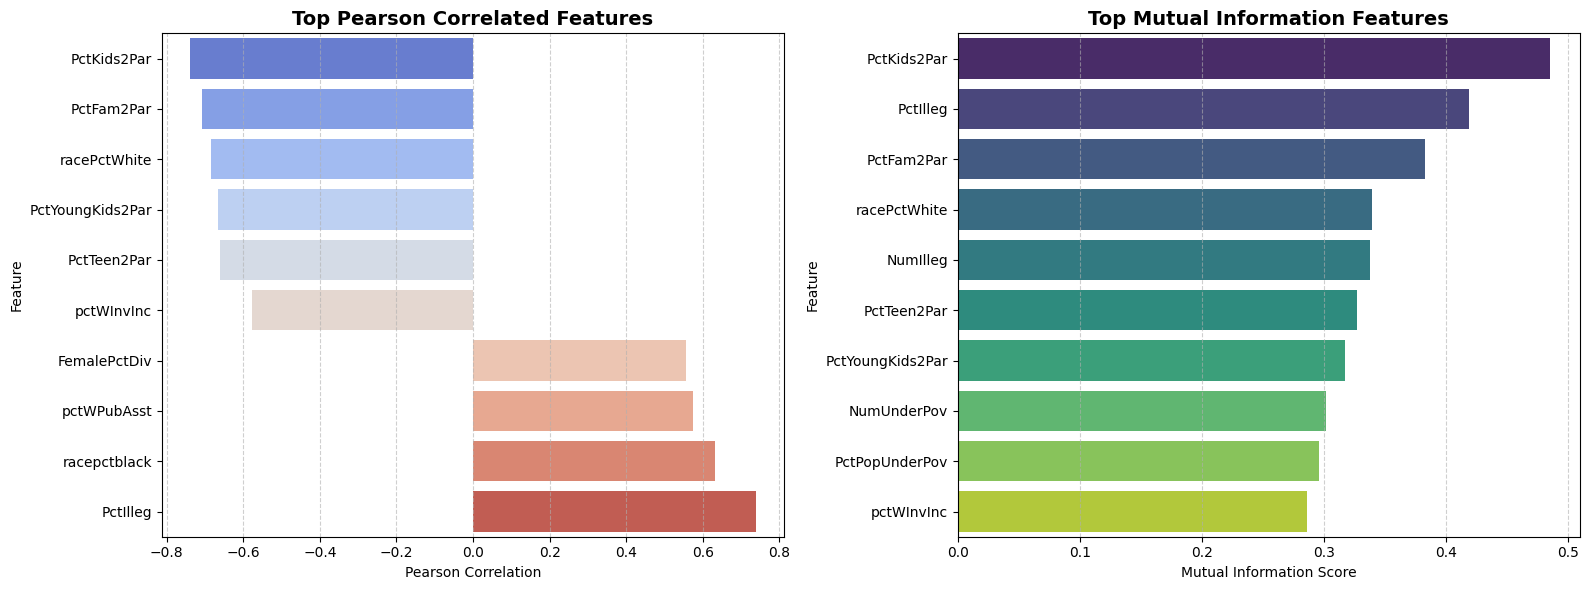

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 取 Top 10 变量
top_k = 10
top_pearson = pearson_corr.loc[pearson_corr_abs.head(top_k).index].sort_values()
top_mi = mi_scores.head(top_k)

# 设置画布
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 🎯 子图1：Pearson
sns.barplot(
    x=top_pearson.values,
    y=top_pearson.index,
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Top Pearson Correlated Features", fontsize=14, weight='bold')
axes[0].set_xlabel("Pearson Correlation")
axes[0].set_ylabel("Feature")
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# 🎯 子图2：Mutual Info
sns.barplot(
    x=top_mi.values,
    y=top_mi.index,
    palette="viridis",
    ax=axes[1]
)
axes[1].set_title("Top Mutual Information Features", fontsize=14, weight='bold')
axes[1].set_xlabel("Mutual Information Score")
axes[1].set_ylabel("Feature")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# 收尾
plt.tight_layout()
plt.show()


In [16]:
pip install adjustText

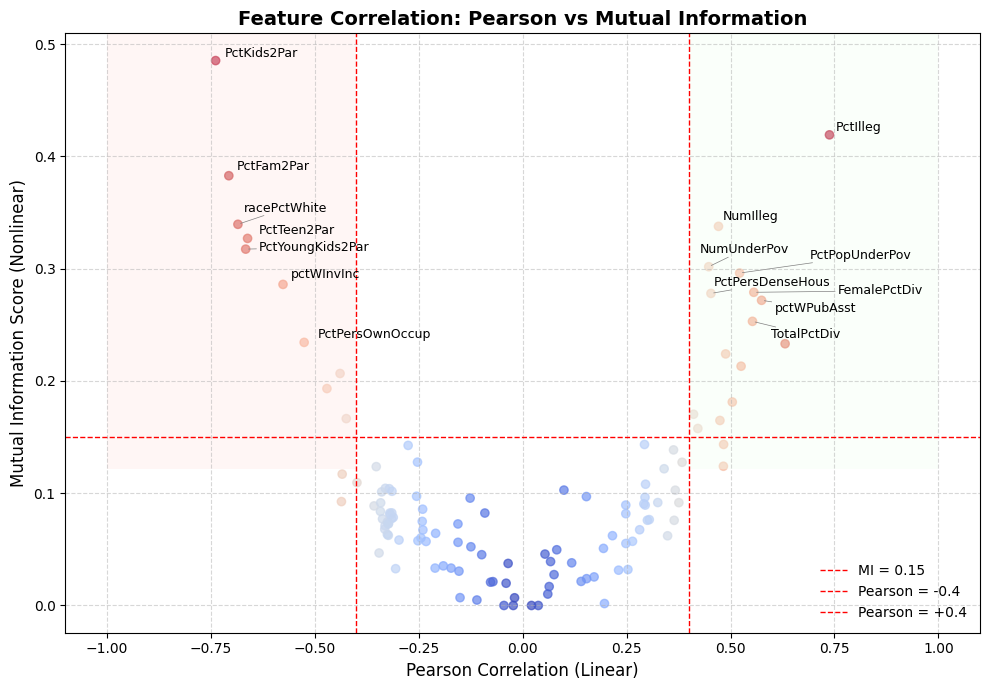

In [17]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 散点图
sc = plt.scatter(
    correlation_table["Pearson"],
    correlation_table["Mutual_Info"],
    alpha=0.7,
    c=correlation_table["Pearson_abs"],
    cmap="coolwarm"
)

# 标题和坐标轴
plt.title("Feature Correlation: Pearson vs Mutual Information", fontsize=14, weight='bold')
plt.xlabel("Pearson Correlation (Linear)", fontsize=12)
plt.ylabel("Mutual Information Score (Nonlinear)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# 背景色区域：左上（线性弱、非线性强）与右上（线性非线性都强）
plt.axvspan(xmin=-1, xmax=-0.4, ymin=0.15/0.55, ymax=1, facecolor='mistyrose', alpha=0.3)
plt.axvspan(xmin=0.4, xmax=1, ymin=0.15/0.55, ymax=1, facecolor='honeydew', alpha=0.3)

# 辅助线
plt.axhline(y=0.15, color='red', linestyle='--', linewidth=1, label='MI = 0.15')
plt.axvline(x=-0.4, color='red', linestyle='--', linewidth=1, label='Pearson = -0.4')
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=1, label='Pearson = +0.4')

# 标注前15的变量
texts = []
top_features = correlation_table.sort_values("Mutual_Info", ascending=False).head(15).index
for feature in top_features:
    x = correlation_table.loc[feature, "Pearson"]
    y = correlation_table.loc[feature, "Mutual_Info"]
    texts.append(plt.text(x, y, feature, fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# ✅ 图例移到右下角
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()




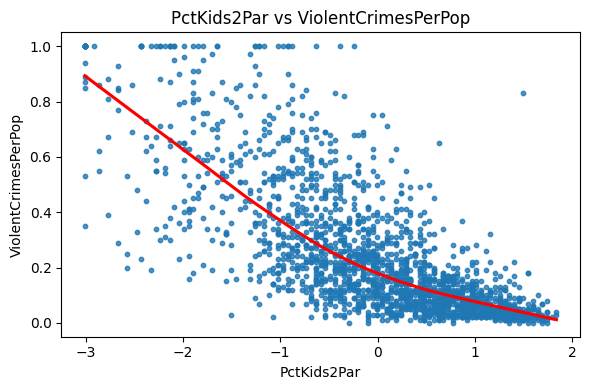

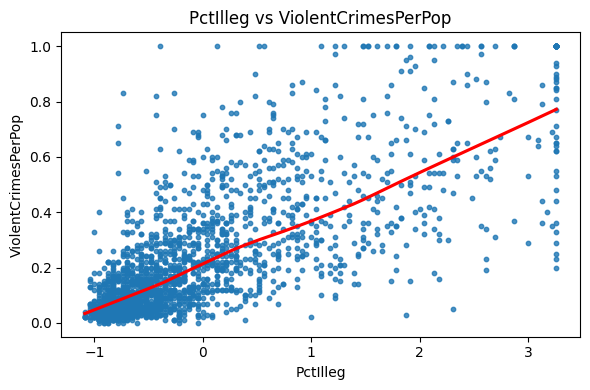

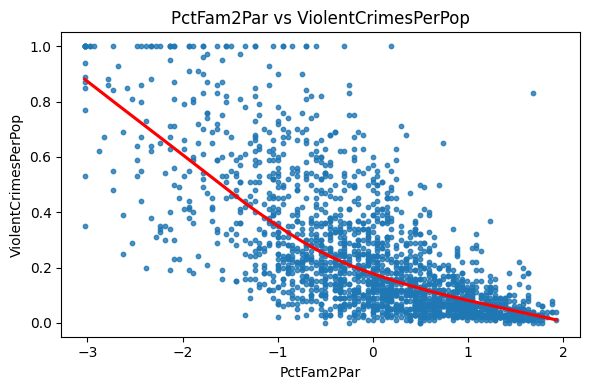

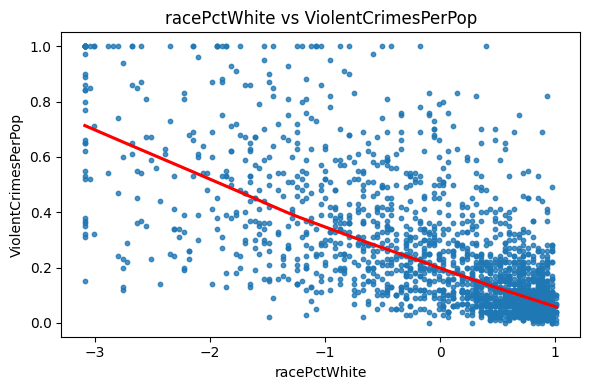

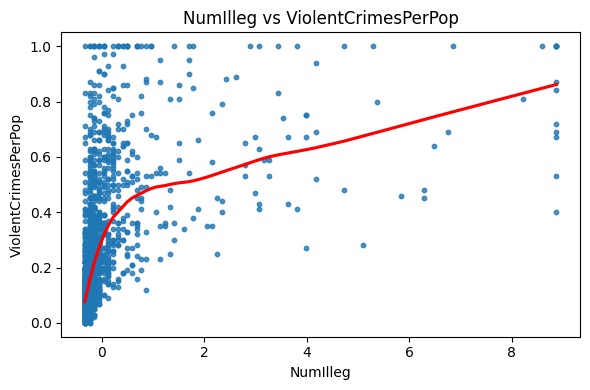

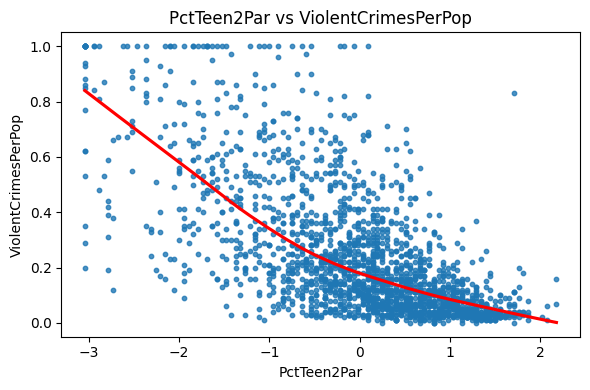

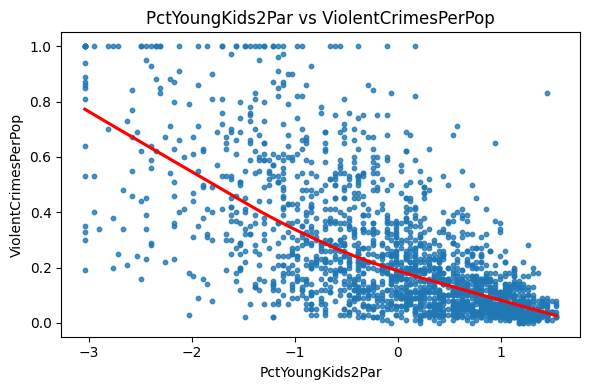

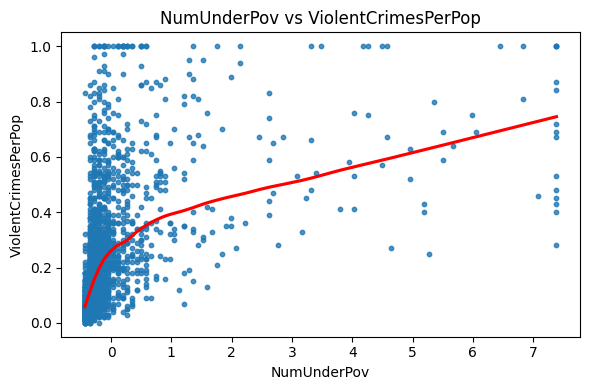

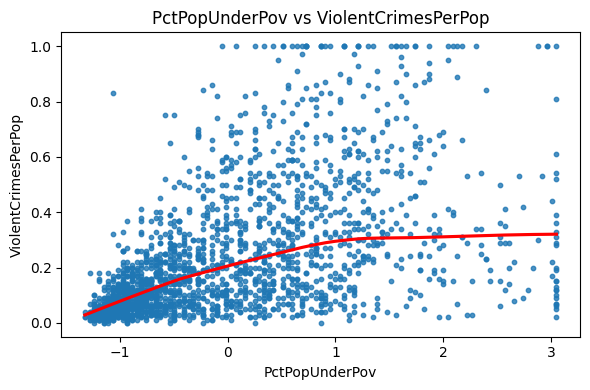

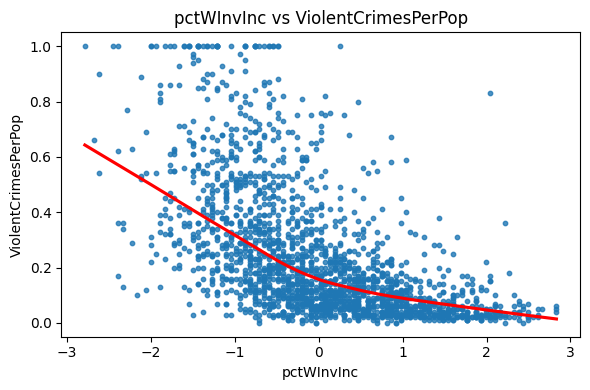

In [18]:
# 选出互信息排名前 top_k 个变量，绘制散点图看趋势
import seaborn as sns

for feature in mi_scores.head(top_k).index:
    plt.figure(figsize=(6,4))
    sns.regplot(x=X_df[feature], y=Y_series, lowess=True, scatter_kws={"s":10}, line_kws={"color":"red"})
    plt.title(f"{feature} vs ViolentCrimesPerPop")
    plt.xlabel(feature)
    plt.ylabel("ViolentCrimesPerPop")
    plt.tight_layout()
    plt.show()


In [19]:
# 设定条件：|Pearson| > 0.4 或 Mutual_Info > 0.15
condition = (correlation_table["Pearson_abs"] > 0.4) | (correlation_table["Mutual_Info"] > 0.15)
correlation_selected = correlation_table[condition].copy()
selected_variable_names = correlation_selected.index.tolist()
print(selected_variable_names)

['FemalePctDiv', 'HousVacant', 'MalePctDivorce', 'NumIlleg', 'NumUnderPov', 'PctFam2Par', 'PctHousLess3BR', 'PctHousNoPhone', 'PctHousOwnOcc', 'PctIlleg', 'PctKids2Par', 'PctLess9thGrade', 'PctNotHSGrad', 'PctPersDenseHous', 'PctPersOwnOccup', 'PctPolicWhite', 'PctPopUnderPov', 'PctTeen2Par', 'PctUnemployed', 'PctVacantBoarded', 'PctYoungKids2Par', 'RacialMatchCommPol', 'TotalPctDiv', 'medFamInc', 'medIncome', 'pctWInvInc', 'pctWPubAsst', 'racePctWhite', 'racepctblack']


In [20]:
forward_selected = [
    'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29', 'agePct16t24',
    'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
    'pctWSocSec', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy',
    'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
    'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
    'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
    'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
    'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', 'OwnOccMedVal',
    'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctSameCity85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
    'LemasTotalReq', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
    'PctPolicWhite', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'PctUsePubTrans',
    'PolicOperBudg', 'LemasGangUnitDeploy', 'PolicBudgPerPop'
]
backward_selected = [
    'racepctblack', 'racePctHisp', 'agePct12t29', 'pctUrban', 'pctWWage',
    'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc',
    'whitePerCap', 'indianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov',
    'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu',
    'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv',
    'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig', 'PctNotSpeakEnglWell',
    'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup',
    'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart',
    'OwnOccMedVal', 'RentLowQ', 'MedRent', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasTotalReq',
    'PolicReqPerOffic', 'PolicPerPop', 'PctPolicAsian', 'OfficAssgnDrugUnits',
    'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasGangUnitDeploy',
    'PolicBudgPerPop'
]

In [21]:
combined_variables = list(set(selected_variable_names) | set(forward_selected) | set(backward_selected))
X_selected = X[combined_variables]

In [22]:
X_selected

,pctUrban,PctNotSpeakEnglWell,MedRent,PctBSorMore,LemasSwornFT,PctWorkMom,PctPersOwnOccup,pctWInvInc,NumImmig,PctIlleg,...,RentLowQ,PctOccupMgmtProf,LemasSwFTFieldOps,PctSameCity85,racePctWhite,PctFam2Par,PctHousNoPhone,PolicOperBudg,LemasGangUnitDeploy,OwnOccMedVal
0,1.0,0.06,0.34,0.48,3,0.76,0.55,0.60,0.03,0.14,...,0.36,0.52,29,0.51,0.90,0.55,0.14,4,1,0.19
1,1.0,0.10,0.37,0.30,38,0.53,0.26,0.45,0.01,0.24,...,0.42,0.36,34,0.60,0.74,0.43,0.16,38,3,0.20
2,0.0,0.04,0.31,0.19,38,0.67,0.42,0.39,0.00,0.46,...,0.27,0.32,34,0.67,0.56,0.42,0.47,38,3,0.17
3,1.0,0.08,0.89,0.31,38,0.86,0.94,0.43,0.02,0.33,...,0.75,0.39,34,0.64,0.08,0.65,0.11,38,3,0.21
4,0.9,0.05,0.38,0.33,38,0.60,0.89,0.68,0.00,0.06,...,0.40,0.46,34,0.61,0.95,0.91,0.05,38,3,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1.0,0.09,0.41,0.65,38,0.73,0.55,0.64,0.01,0.11,...,0.45,0.70,34,0.48,0.87,0.63,0.07,38,3,0.22
1990,1.0,0.36,0.54,0.22,38,0.40,0.12,0.30,0.05,0.42,...,0.54,0.24,34,0.10,0.28,0.66,0.17,38,3,0.37
1991,1.0,0.28,0.37,0.21,6,0.46,0.38,0.45,0.06,0.54,...,0.28,0.32,26,0.79,0.69,0.42,0.31,6,0,0.32
1992,1.0,0.20,0.64,0.42,2,0.63,0.39,0.55,0.06,0.17,...,0.58,0.48,30,0.59,0.87,0.64,0.10,2,0,0.49


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


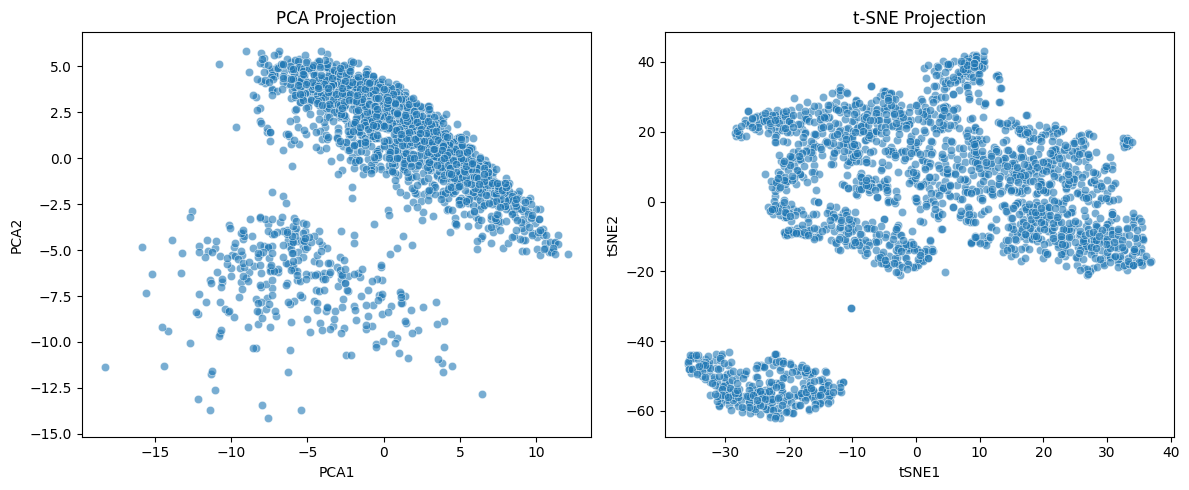

In [24]:
# PCA 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
# t-SNE 降维
tsne = TSNE(n_components=2, perplexity=50, n_iter=2000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
# 可视化
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", alpha=0.6)
plt.title("PCA Projection")
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_tsne_df, x="tSNE1", y="tSNE2", alpha=0.6)
plt.title("t-SNE Projection")
plt.tight_layout()
plt.show()

In [25]:
!pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


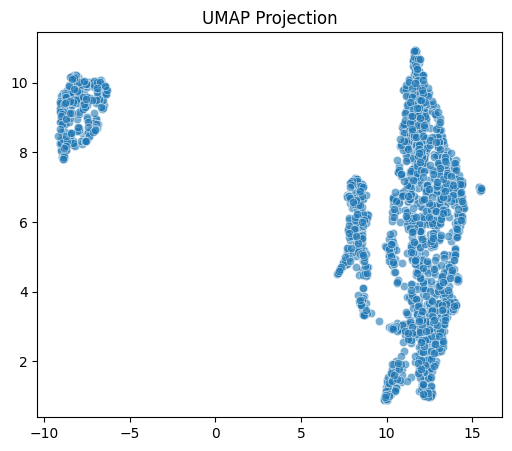

In [26]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 可视化
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.6)
plt.title("UMAP Projection")
plt.show()


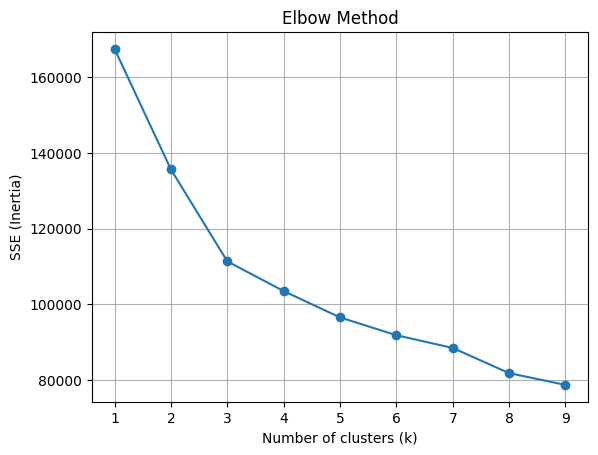

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sse.append(km.inertia_)  # inertia_ = 簇内误差平方和

plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


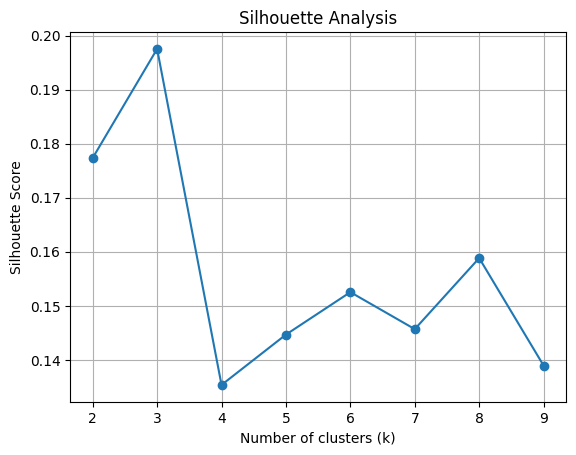

In [28]:
from sklearn.metrics import silhouette_score

scores = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()


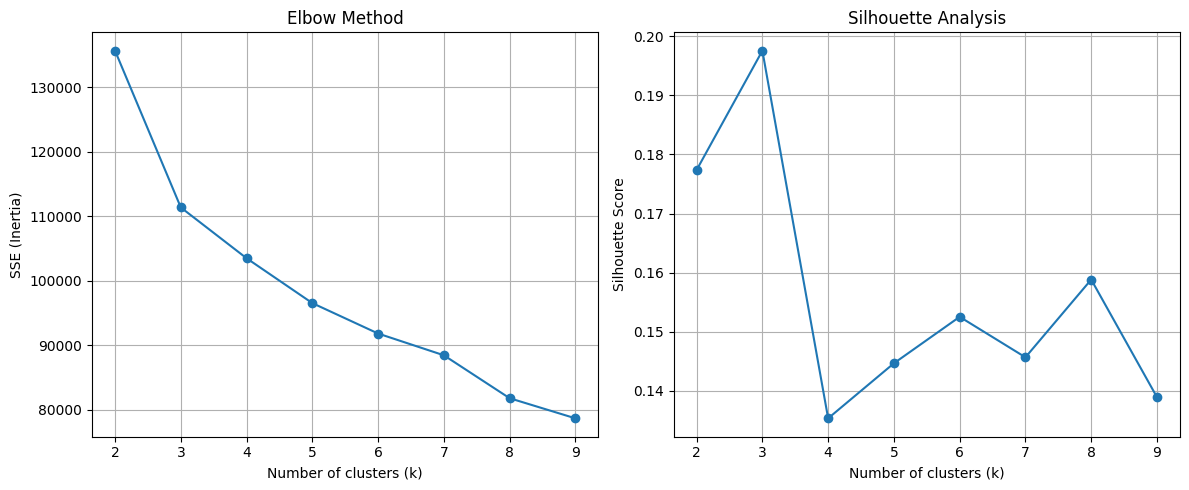

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sse.append(km.inertia_)
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_scores.append(score)

# 画图
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method
axes[0].plot(K_range, sse, marker='o')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('SSE (Inertia)')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
axes[1].grid(True)

plt.tight_layout()
plt.show()


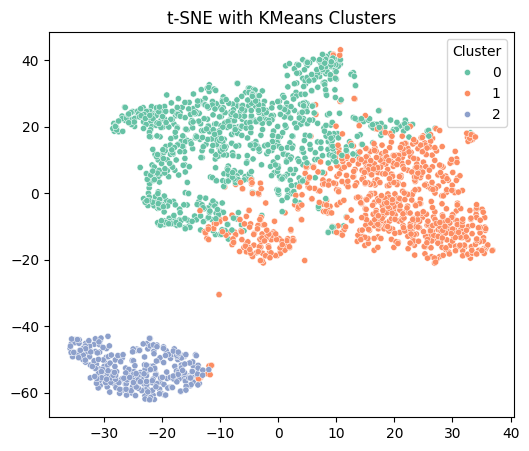

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 在 t-SNE 图中可视化聚类
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2', s=20)
plt.title("t-SNE with KMeans Clusters")
plt.legend(title='Cluster')
plt.show()


In [31]:
X_selected['cluster'] = labels
cluster_summary = X_selected.groupby('cluster').mean().T
cluster_summary['std'] = cluster_summary.std(axis=1)
top_diff_vars = cluster_summary.sort_values(by='std', ascending=False).head(15)


<ipython-input-31-748521414031>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['cluster'] = labels


In [32]:
cluster_summary

cluster,0,1,2,std
pctUrban,0.464316,0.845006,0.992290,0.272450
PctNotSpeakEnglWell,0.161635,0.098777,0.249742,0.075834
MedRent,0.248788,0.549325,0.358129,0.152115
PctBSorMore,0.251769,0.494064,0.345161,0.122203
LemasSwornFT,38.000000,37.541401,5.945161,18.375914
...,...,...,...,...
PctFam2Par,0.515106,0.783197,0.452516,0.175661
PctHousNoPhone,0.417063,0.063083,0.331968,0.184771
PolicOperBudg,38.000000,37.552866,6.303226,18.172440
LemasGangUnitDeploy,3.000000,2.974522,0.883871,1.214460


In [33]:
top_vars_per_cluster = {}

for c in cluster_summary.columns[:-1]:  # 排除 'std' 列
    sorted_vars = cluster_summary[c].sort_values(ascending=False).index.tolist()
    top_vars_per_cluster[c] = sorted_vars

# 示例：输出每一类的变量名（已排序）
for cluster_id, var_list in top_vars_per_cluster.items():
    print(f"Cluster {cluster_id} variables (sorted):")
    print(var_list)
    print()


Cluster 0 variables (sorted):
['RacialMatchCommPol', 'PolicReqPerOffic', 'PctPolicWhite', 'PolicCars', 'PolicPerPop', 'LemasSwFTPerPop', 'PolicBudgPerPop', 'PctPolicAsian', 'LemasTotalReq', 'PolicOperBudg', 'LemasSwornFT', 'LemasSwFTFieldOps', 'OfficAssgnDrugUnits', 'OtherPerCap', 'LemasGangUnitDeploy', 'racePctWhite', 'PctHousOccup', 'PctSameCity85', 'PctHousLess3BR', 'TotalPctDiv', 'PctYoungKids2Par', 'FemalePctDiv', 'pctWSocSec', 'MalePctDivorce', 'agePct12t29', 'PctKids2Par', 'PctWorkMom', 'MedRentPctHousInc', 'PctFam2Par', 'PctTeen2Par', 'PctOccupManu', 'PctNotHSGrad', 'pctWRetire', 'PctHousOwnOcc', 'PctPersOwnOccup', 'pctWWage', 'PctVacMore6Mos', 'pctUrban', 'PctUnemployed', 'PctPopUnderPov', 'MalePctNevMarr', 'PersPerRentOccHous', 'PersPerOccupHous', 'pctWPubAsst', 'PctLess9thGrade', 'PctEmplManu', 'PctHousNoPhone', 'PctEmploy', 'MedOwnCostPctIncNoMtg', 'pctWInvInc', 'MedOwnCostPctInc', 'agePct16t24', 'PctOccupMgmtProf', 'pctWFarmSelf', 'PctIlleg', 'HispPerCap', 'PctLargHouseOcc

### XGBoost

In [40]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#ViolentCrimesPerPop > 0.5 → label 1 (high‐violence), ≤ 0.5 → label 0 (low‐violence)
y_binary = (Y_series > 0.5).astype(int)

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# Fit on your PCA features + binary target
model.fit(X_pca, y_binary)

# Predict and evaluate
y_pred = model.predict(X_pca)
y_prob = model.predict_proba(X_pca)[:,1]

print("Accuracy :", accuracy_score(y_binary, y_pred))
print("ROC AUC  :", roc_auc_score(y_binary, y_prob))
print("\nClassification Report:\n", classification_report(y_binary, y_pred))

Accuracy : 0.9097291875626881
ROC AUC  : 0.9449663484080411

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1717
           1       0.79      0.48      0.59       277

    accuracy                           0.91      1994
   macro avg       0.86      0.73      0.77      1994
weighted avg       0.90      0.91      0.90      1994



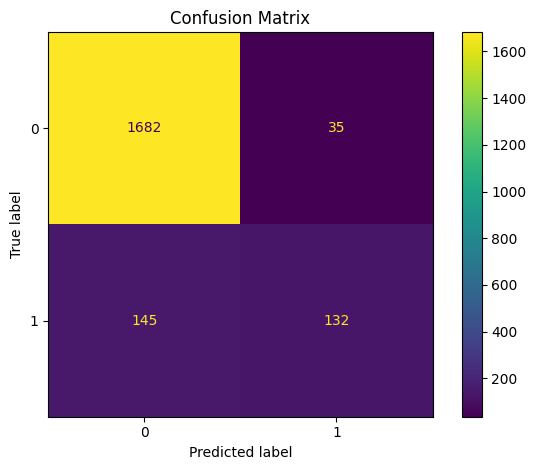

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_pca)

# Compute the confusion matrix
cm = confusion_matrix(y_binary, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


From the result:

1. Strong at spotting safe areas: The XGBoost is good if our priority is not over-allocating resources to safe neighborhoods.

2. Weak at catching all hot spots: Only 48%  on high-violence means failing to indicate 1/2 of the areas that most need intervention

3. High ROC AUC but suboptimal threshold: AUC = 0.945 shows the model could separate classes well.

For better high-violence recall, we should adjust the decision cutoff.

Right now it's 0.5, we could choose a lower threshold (e.g. 0.2) to boost high-violence recall.

At 0.5 you get fairly few false alarms (FP = 35), but too many misses (FN = 145)



In [50]:
#Change the cutoff to 0.2
#ViolentCrimesPerPop > 0.2 → label 1 (high‐violence), ≤ 0.2 → label 0 (low‐violence)
y_binary1 = (Y_series > 0.2).astype(int)

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# Fit on your PCA features + binary target
model.fit(X_pca, y_binary1)

# Predict and evaluate
y_pred1 = model.predict(X_pca)
y_prob1 = model.predict_proba(X_pca)[:,1]

print("Accuracy :", accuracy_score(y_binary1, y_pred1))
print("ROC AUC  :", roc_auc_score(y_binary1, y_prob1))
print("\nClassification Report:\n", classification_report(y_binary1, y_pred1))

Accuracy : 0.843530591775326
ROC AUC  : 0.9215709618935426

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1188
           1       0.84      0.75      0.80       806

    accuracy                           0.84      1994
   macro avg       0.84      0.83      0.83      1994
weighted avg       0.84      0.84      0.84      1994



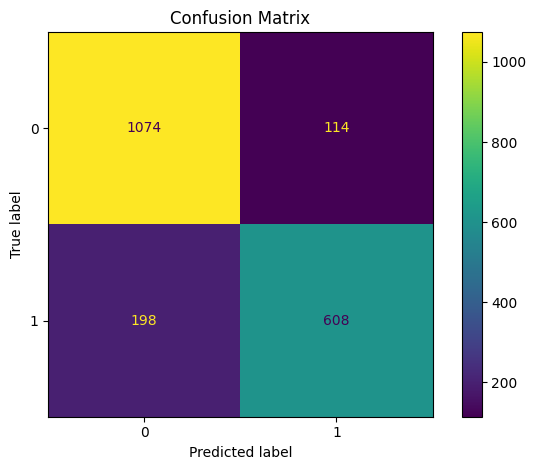

In [51]:
# Generate predictions
y_pred1 = model.predict(X_pca)

# Compute the confusion matrix
cm = confusion_matrix(y_binary1, y_pred1)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

After changing the cutoff to 0.2, the high_violence recall has been improved to 75%, and still maintain a 90% low-violence recall